<a href="https://colab.research.google.com/github/Samarjeet-gh/desktop-tutorial/blob/main/MLWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [55]:
headernames = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]

In [56]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [57]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, 4].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
#print(X_test)

In [60]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train);

In [ ]:
Y_pred = classifier.predict(X_train)

In [ ]:
accuracy = accuracy_score(Y_train, Y_pred)
print("accuracy : ",  accuracy)

accuracy :  0.9809523809523809


In [ ]:
Y_pred = classifier.predict(X_test)

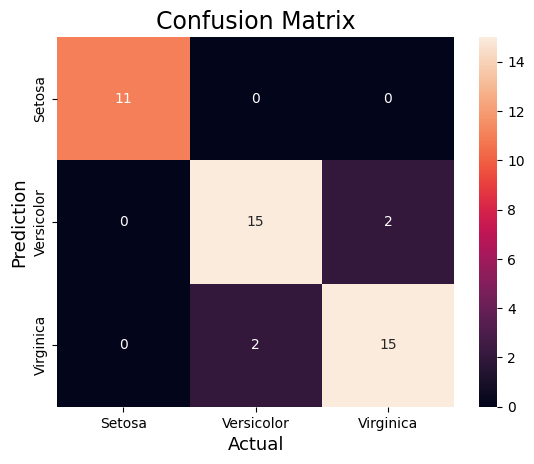

In [ ]:
result = confusion_matrix(Y_test, Y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
result1 = classification_report(Y_test, Y_pred)
print("Classification Report")
print(result1)
accuracy = accuracy_score(Y_test, Y_pred)
print("accuracy : ", accuracy)

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      0.88      0.88        17
 Iris-virginica       0.88      0.88      0.88        17

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.91      0.91      0.91        45

accuracy :  0.9111111111111111


In [61]:
from sklearn.svm import SVC
accuracy_list = []

In [62]:
for i in ("linear", "poly", "rbf", "sigmoid"):
  clf = SVC(kernel=i)
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_train)
  accuracy = accuracy_score(Y_train, Y_pred)
  accuracy_list.append(accuracy)
  print("accuracy of " +i, "is", accuracy)

accuracy of linear is 0.9619047619047619
accuracy of poly is 0.9142857142857143
accuracy of rbf is 0.9714285714285714
accuracy of sigmoid is 0.8952380952380953


In [63]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

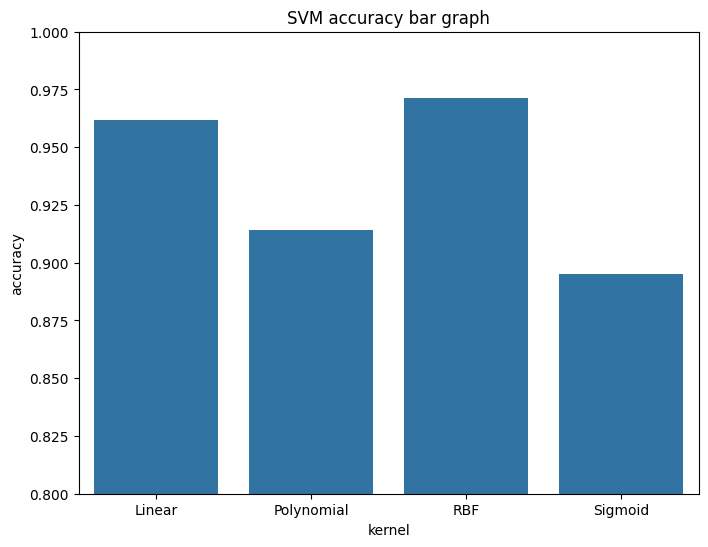

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.xlabel("kernel")
plt.ylabel("accuracy")
plt.title("SVM accuracy bar graph")
plt.ylim(0.8,1.0)
plt.show()

In [65]:
from sklearn.svm import SVC
accuracy_list = []

for i in ("linear", "poly", "rbf", "sigmoid"):
  clf = SVC(kernel=i)
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of " +i, "is", accuracy)

accuracy of linear is 0.9555555555555556
accuracy of poly is 0.9555555555555556
accuracy of rbf is 0.9777777777777777
accuracy of sigmoid is 0.9555555555555556


In [66]:
accuracies = {
    "Linear" : accuracy_list[0],
    "Polynomial" : accuracy_list[1],
    "RBF" : accuracy_list[2],
    "Sigmoid" : accuracy_list[3]
}

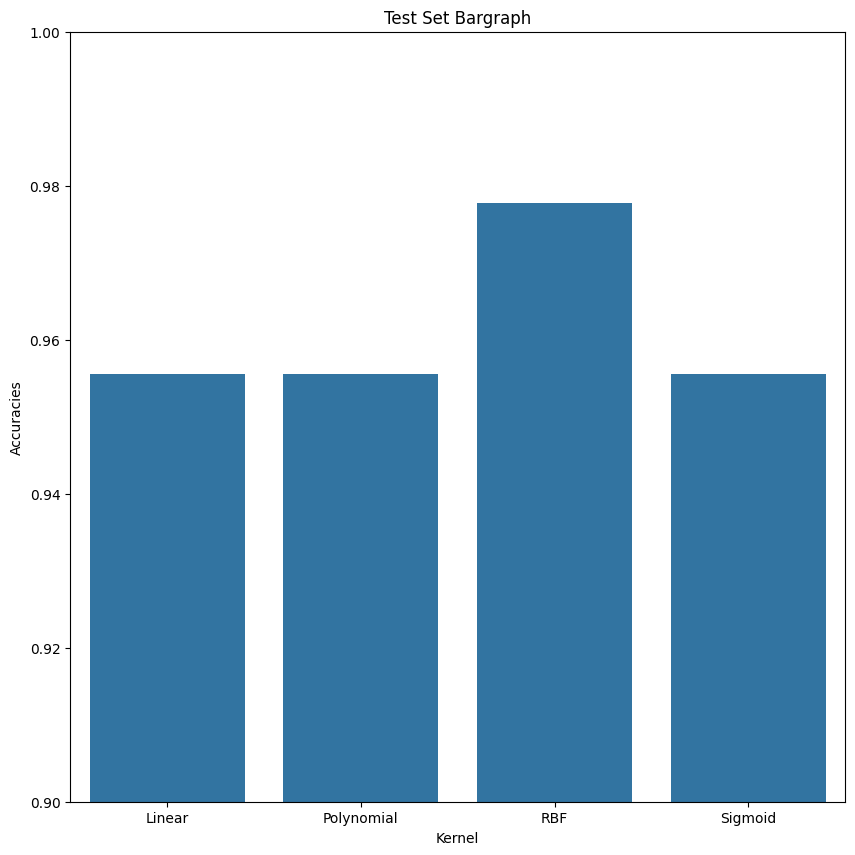

In [67]:
plt.figure(figsize=(10,10))
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.xlabel("Kernel")
plt.ylabel("Accuracies")
plt.title("Test Set Bargraph")
plt.ylim(0.9,1.0)
plt.show()

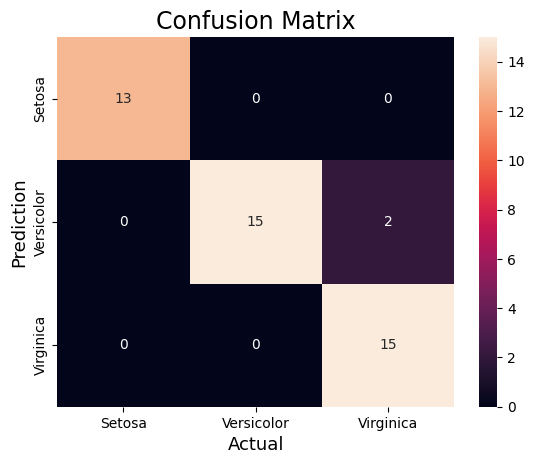

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, Y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()